<a href="https://colab.research.google.com/github/Manojpatil123/Capstone-project-Supervised_machinelearning-on-Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

### Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#GOAL of the project
Today's word usage of energy is increasing rapidly. Due to more usage of energy in some parts of the world, we are facing a lack of energy and it leads to environmental pollution. In some of the places, we are facing outrageous energy consumption in home appliances, so our main goal in this project is to analyse what the factors are affecting the increasing energy consumption of home appliances, how we can reduce the energy consumption of home appliances, and predict energy consumption of appliances by using regression models.

# Tabel of content 


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature selection__
   
* __Step 5: Feature engineering__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Cross validation__

* __Step 9: Model explainability__

* __Step 10: Conclusion__


In [44]:
#installing package
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the Relevant Libraries

In [45]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

Loding dataset to pandas dataframe

In [46]:
#importing dataset
path='/content/drive/MyDrive/Alma better/Alma better/capstone project/supervised learning (regression)/data_application_energy.csv'
df=pd.read_csv(path)

In [47]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Checking shape of dataset
 Here 1st value counts number of data points and second value represents the number of features in the dataset



In [48]:
#checking shape of the dataset
df.shape

(19735, 29)

in our dataset 29 columns and 19735 rows are present

## Data set information

date time year-month-day hour:minute:second 

Appliances, energy use in Wh (Dependent variable) 

lights, energy use of light fixtures in the house in Wh (Drop this column) 

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius 

RH2, Humidity in living room area, in % 

T3, Temperature in laundry room area 

RH3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius

RH4, Humidity in office room, in % 

T5, Temperature in bathroom, in Celsius 

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius 

RH6, Humidity outside the building (north side), in % 

T7, Temperature in ironing room , in Celsius 

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8, Humidity in teenager room 2, in % 

T9, Temperature in parents room, in Celsius 

RH9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (from Chievres weather station), in % 

Wind speed (from Chievres weather station), in m/s 

Visibility (from Chievres weather station), in km 

Tdewpoint (from Chievres weather station), Â°C 

rv1, Random variable 1, nondimensional 

 rv2, Random variable 2, nondimensional



# Data Inspection

### Checking all the data types of our dataset holds.

In [49]:
#checking dtypes of data
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

here except data column remaining column are numerical feature

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [50]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Checking columns in our dataset 

In [51]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Checking statistics part of our data i.e. mean,standard deviation, and so on
to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.

In [52]:
#checking statistical info of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### from the statistics part of our data we can observe

*   Max energy usage of appliance is 1080 and min is 10 watt
*   light column having majority of the data 0 values
*   Max pressure outside house is 772.3 mm_hg
*   Max wind speed is 14 m/s

## Categorical features statistics details

With the help of include argument we can mention categorical columns, it will show summary of all the categorical features too.

In [53]:
df.describe(include=['O'])

,date
count,19735
unique,19735
top,2016-01-11 17:00:00
freq,1


# Exploratory Data Analysis

### checking distribution of target variable

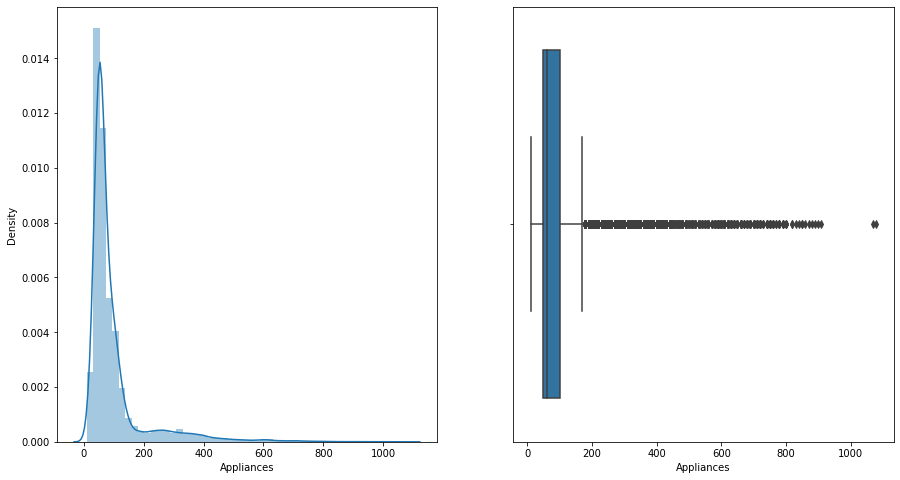

In [54]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(df.Appliances,ax=ax[0])
sns.boxplot(df.Appliances, ax=ax[1])

dependent variable is right skewed and lot of outliers present inour data set

using transformation method on dependent variable

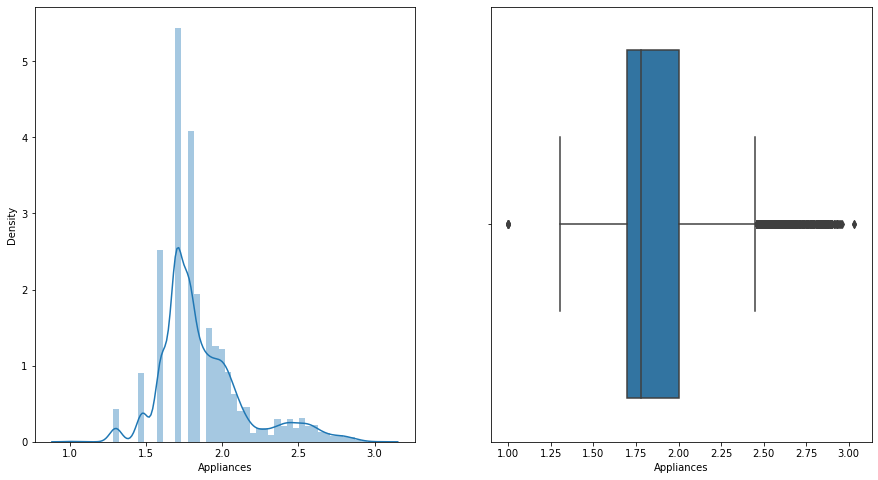

In [55]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(np.log10(df.Appliances),ax=ax[0])
sns.boxplot(np.log10(df.Appliances), ax=ax[1])

 log10 transformation give almost normnal distribution after converting two normal distribution 

### ckecking distribution of all the features

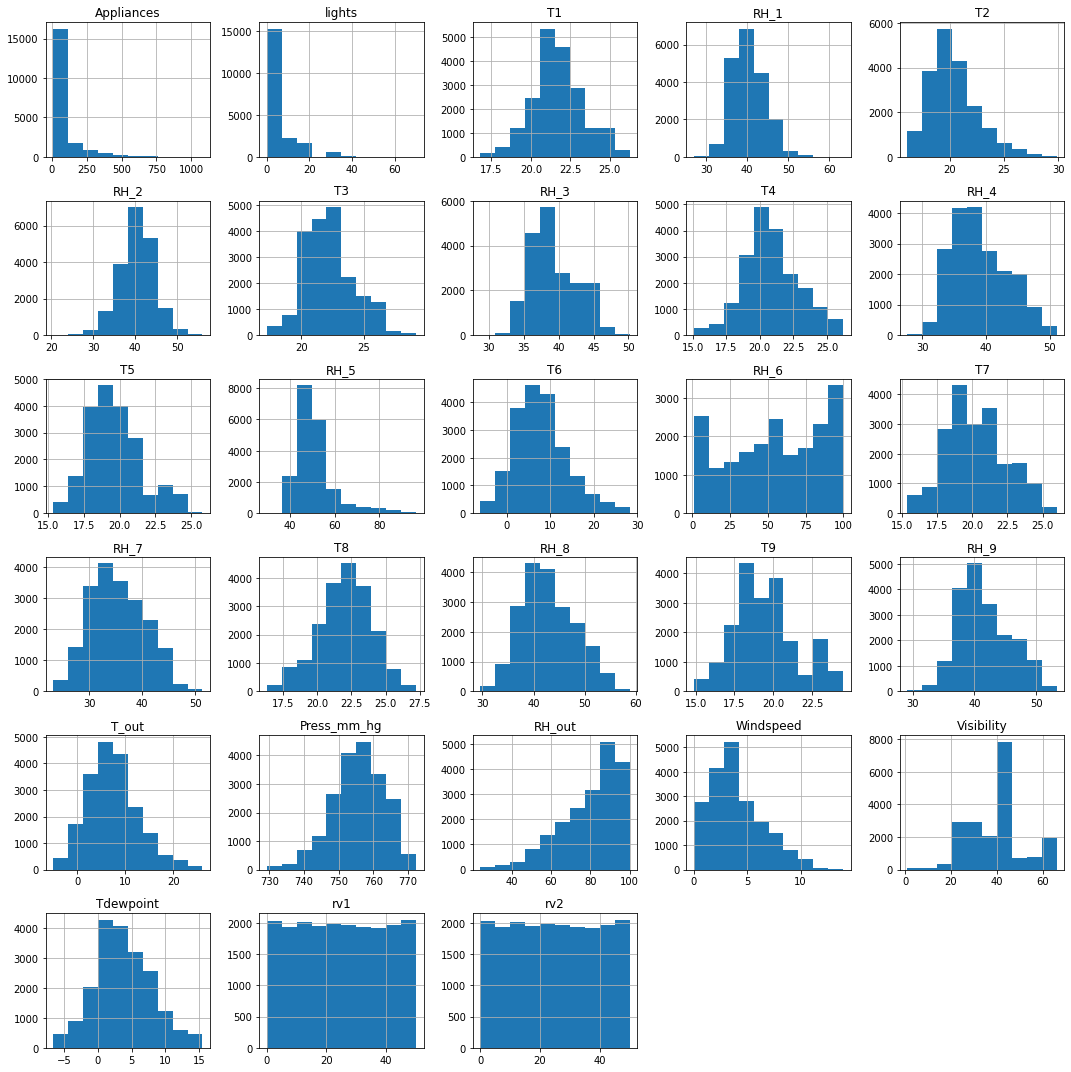

In [56]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

except lights, RH6 ,RH _out. windspeed, rv1, rv2column all the remaining columns are normal distributed data.

### checking relation between all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0265727e50>,
      dtype=object)

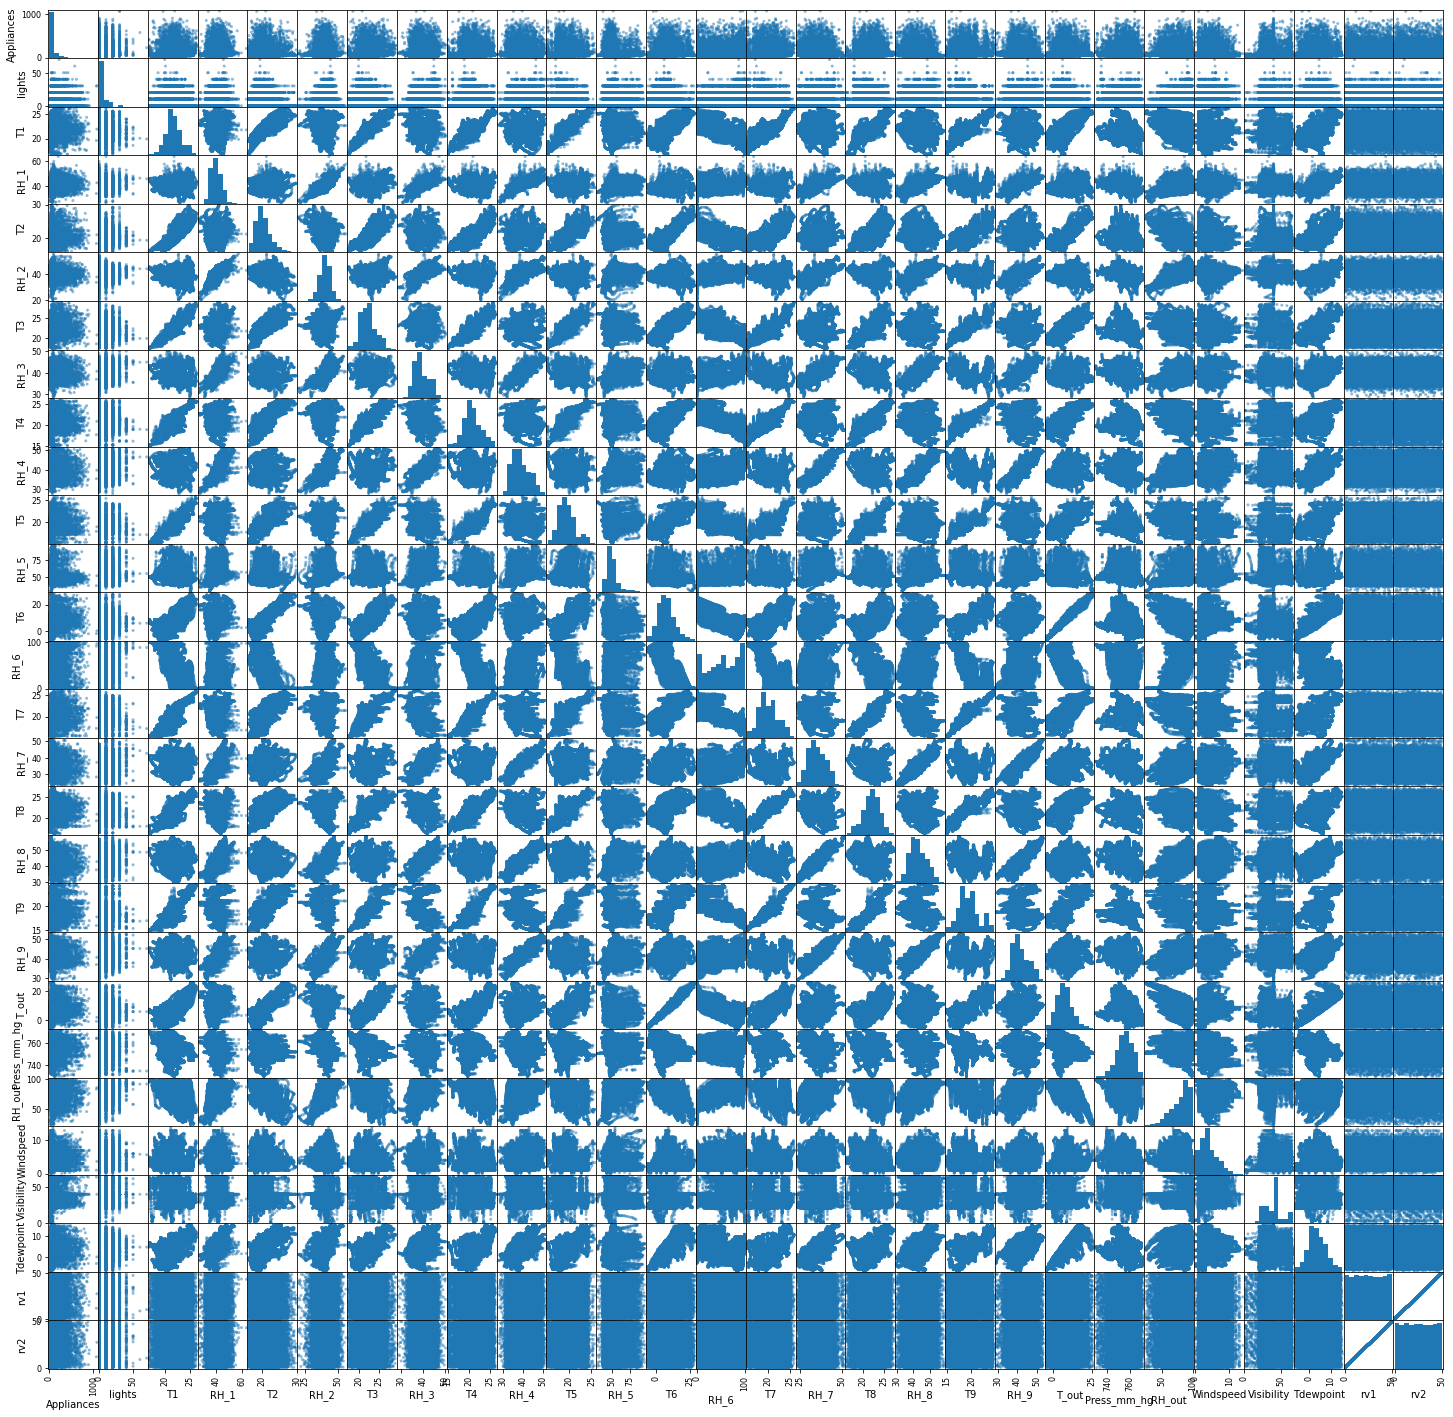

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25,25))

except lights feature all the remaining feature linearly corelate, we need to remove lights feature

### converting dates columns to numerical

In [58]:
#extracting date month time from date time columns
df["dates"]=pd.to_datetime(df['date'])
df['months']=df["dates"].dt.month
df['hour']=df["dates"].dt.hour

## energy consumption vs date 




In [59]:
date=df.groupby(df.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

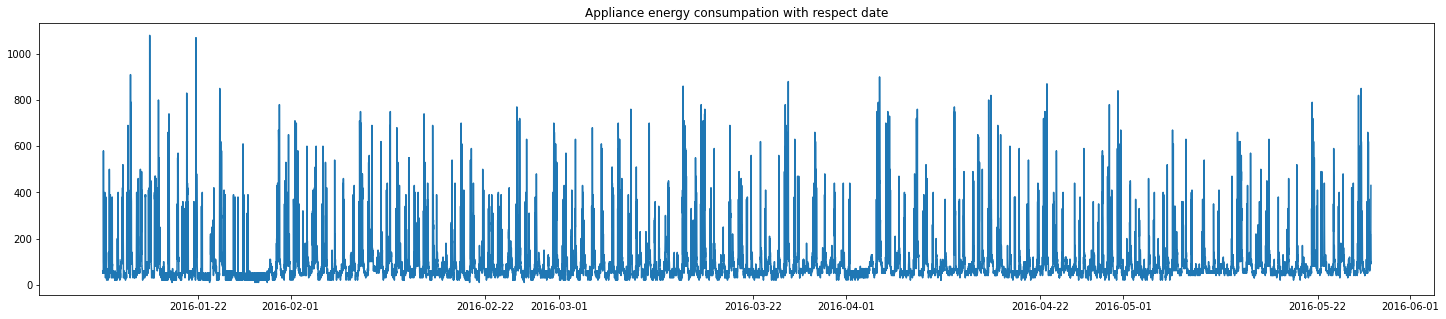

In [60]:
#ploting graph between appliance and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Appliances)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in the march month we can clearly say that appliance consuming more energy, in jan month appliance consuming less energy

## energy consumption vs pressure

In [61]:
pressure=df.groupby(df.months)["Press_mm_hg"].sum().sort_values(ascending=False)
pressure

months
3    3374073.85
4    3259899.30
2    3146144.25
5    2912476.65
1    2217644.50
Name: Press_mm_hg, dtype: float64

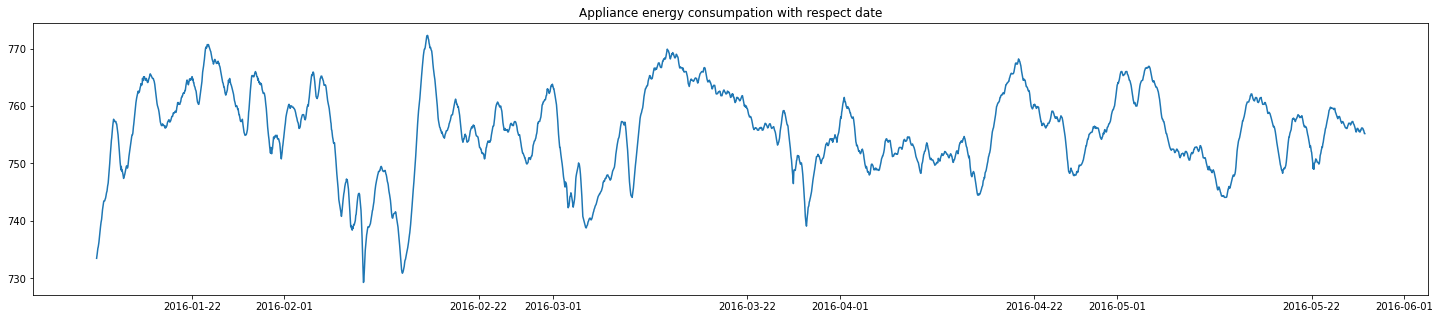

In [62]:
#ploting graph between pressure and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Press_mm_hg)
plt.title("Appliance energy consumpation with respect date")
plt.show()

march month having high pressure is recording and jan month having lesser pressure recording we can clearly say pressure is more impacting on enrgy consumption whenever the high pressure which leads to appliance consume more energy

## energy consumption vs windspeed

In [63]:
Windspeed=df.groupby(df.months)["Windspeed"].sum().sort_values(ascending=False)
Windspeed

months
2    20244.5
3    17824.0
4    15778.5
1    14012.5
5    11865.0
Name: Windspeed, dtype: float64

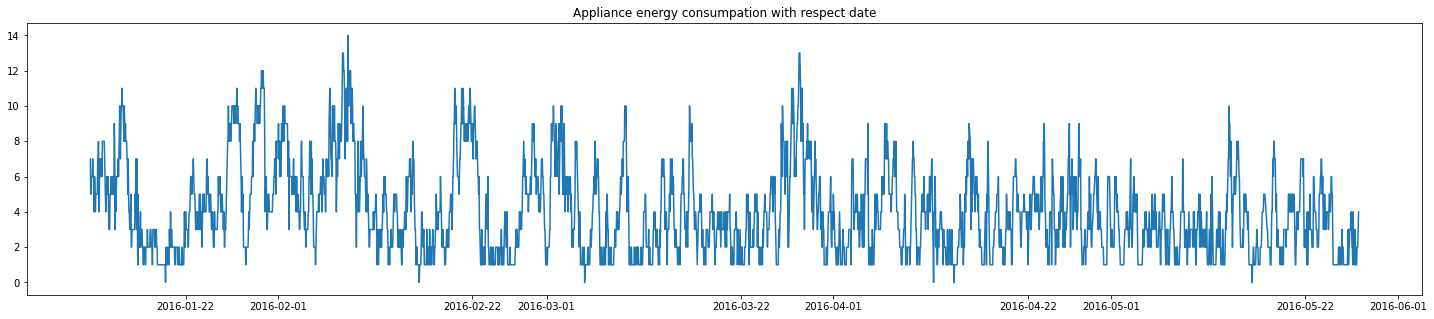

In [64]:
#ploting graph between windspeed and dates
plt.figure(figsize=(25,5))
plt.plot(df.dates, df.Windspeed)
plt.title("Appliance energy consumpation with respect date")
plt.show()

in feb month we wind speed are high but energy consumption is not high on feb month so we can conclude windspeed is not much effective for our target variable

### Checking which day of week has more energy consumption

In [65]:
#extractingf week day 
df['week_days']=df["dates"].dt.dayofweek


In [66]:
Week=df.groupby(df.week_days)["Appliances"].sum().sort_values(ascending=False)
Week

week_days
0    309610
4    297650
5    290690
3    260450
6    259690
2    259000
1    250920
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'energy usage in each days')

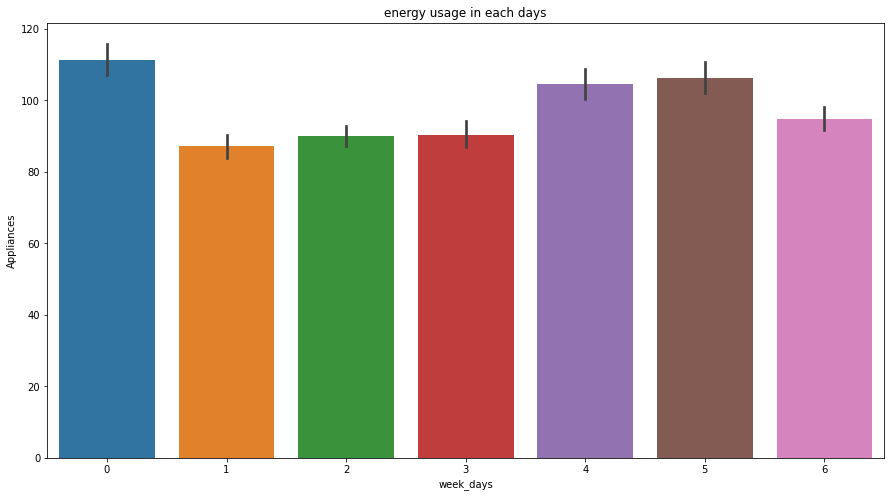

In [67]:
 plt.figure(figsize=(15,8))
sns.barplot(df.week_days,df.Appliances)
plt.title("energy usage in each days")

0 - sunday , sunday has more energy consumption it means that people spend more time inside home

### Comparing target variable with all the Humidity columns

In [68]:
humidity_column=df[['RH_1', 'RH_2','RH_3','RH_4','RH_5', 'RH_6','RH_7','RH_8','RH_9']]

In [69]:
#ploting lineplot for all the humidity columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,humidity_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the Humidity inside house')
plt.show()

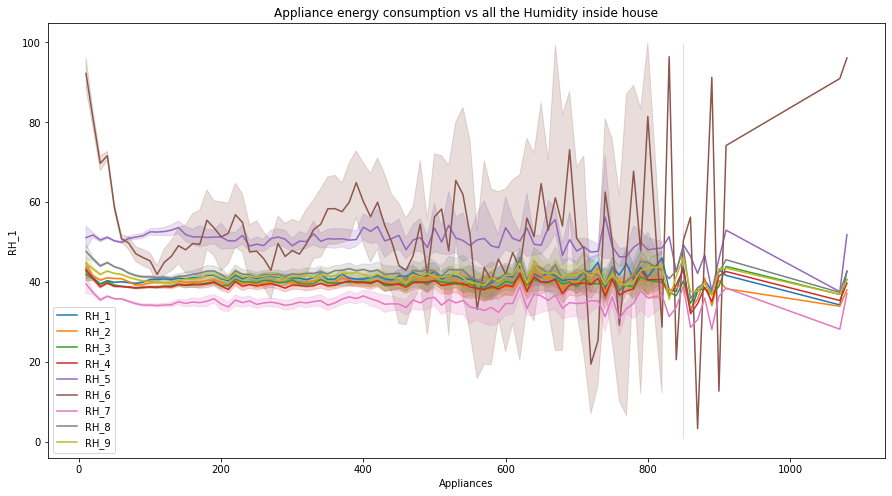

In [70]:
features=humidity_column.columns
line_plot(features)

RH_6 Humidity feature is outside humidity of house it has high variation in the values mostly becouse of outside pressure, temp 

### Comparing target variable with all the temp columns

In [71]:
temp_column=df[['T1', 'T2','T3','T4','T5', 'T6', 'T7',  'T8','T9']]

In [72]:
#ploting lineplot for all the temp columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,temp_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the temp inside house')
plt.show()

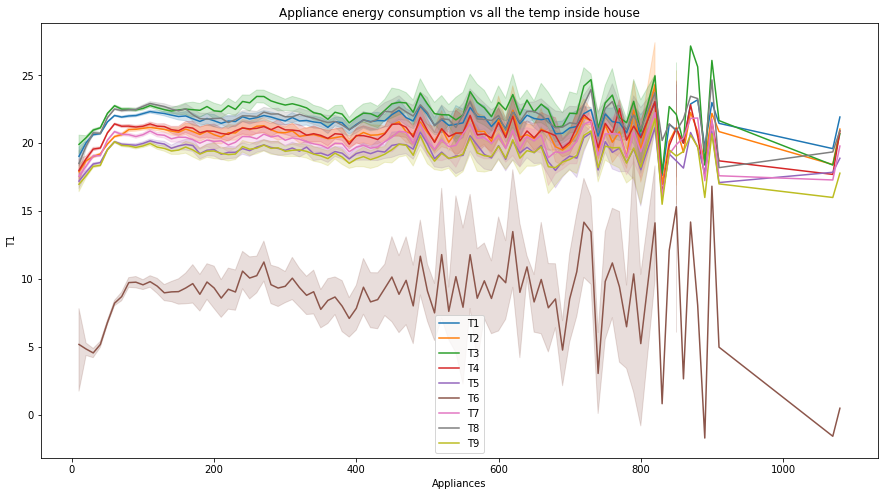

In [73]:
features=temp_column.columns
line_plot(features)

excpet t6 temp all the house inside temp are almost constant in each day but outside temp is having so much variation maybe becouse of pressure, wind speed variation

### Comparing target variable with features calculated by weather station

In [74]:
weather_station_column=df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint' ]]

In [75]:
#ploting lineplot for all the weather station columns
def line_plot(features):
# figure size
 plt.figure(figsize=(15,8))
 for i in features:
  sns.lineplot(df.Appliances,weather_station_column[i], label = i)
 
  plt.title('Appliance energy consumption vs all the values detect through weather station')
plt.show()

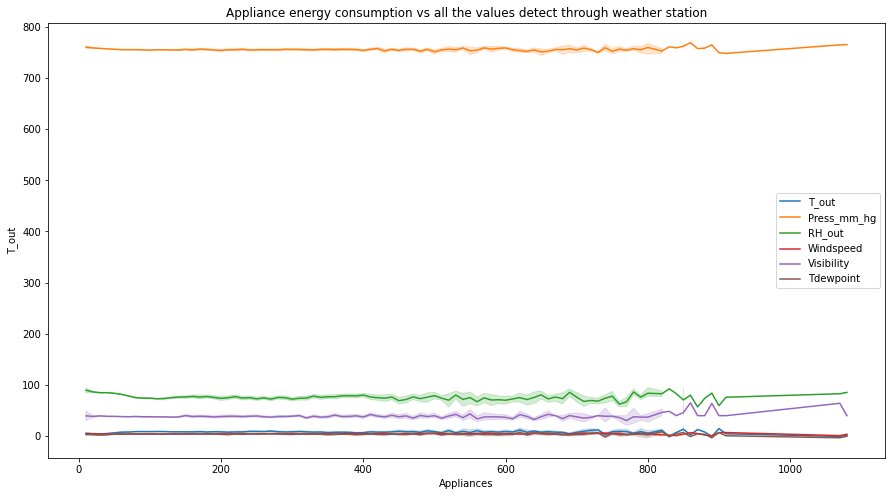

In [76]:
features=weather_station_column.columns
line_plot(features)

all the features having constant values during each day

# Feature selection

In [77]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [78]:
#removing dates column
df.drop("dates",axis=1,inplace=True)

In [79]:
#removing dates column
df.drop("date",axis=1,inplace=True)

In [80]:
df.shape

(19735, 31)

In [81]:
#removing light column
df.drop("lights",axis=1,inplace=True)

### varience threshold removal
using this method we can able to all the columns that have constant values in feature

In [82]:
from sklearn.feature_selection import VarianceThreshold

In [83]:
#implemention variancethreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(df)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

here there is no column in our data set having constant values 

### Feature selection for numerical features using f_regression.

In [84]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [85]:
X=df.iloc[:,1:]
Y=df.iloc[:,1]

In [86]:
#finding the f scores of each features
f_scores = f_regression(X, Y)
f_scores

(array([-9.22265789e+15,  5.45447632e+02,  4.61075600e+04,  1.24206641e-01,
         7.71787875e+04,  1.60977879e+01,  6.57396633e+04,  1.90806744e+02,
         7.14807602e+04,  4.31268020e+00,  1.48088572e+04,  1.20063823e+04,
         4.68035416e+04,  3.67318644e+02,  4.21855486e+04,  8.18762099e-01,
         4.91785739e+04,  1.02128443e+02,  1.72394684e+04,  4.57778784e+02,
         2.67450237e+03,  1.52785239e+02,  1.15277837e+02,  9.56159230e+03,
         7.59303712e-01,  7.59303712e-01,  1.96437503e+04,  6.52122368e+02,
         3.76522808e-02]),
 array([1.00000000e+000, 5.05407514e-119, 0.00000000e+000, 7.24519851e-001,
        0.00000000e+000, 6.03760759e-005, 0.00000000e+000, 3.36788958e-043,
        0.00000000e+000, 3.78422256e-002, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 3.92005688e-081, 0.00000000e+000, 3.65553395e-001,
        0.00000000e+000, 5.95129061e-024, 0.00000000e+000, 2.02185720e-100,
        0.00000000e+000, 5.74986160e-035, 8.11349139e-027, 0.

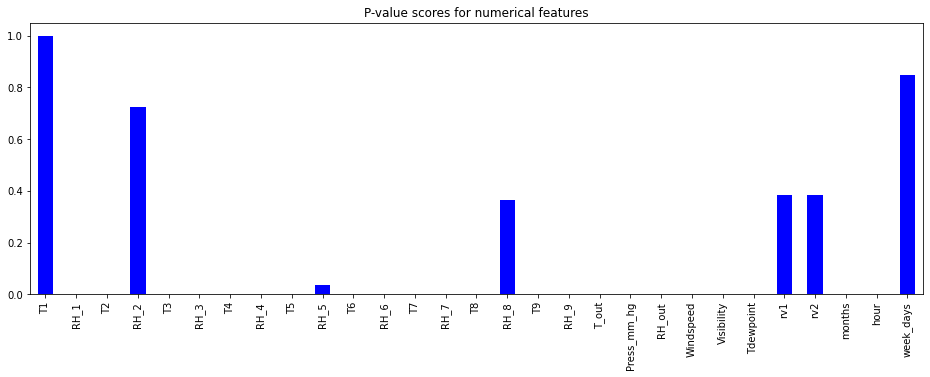

In [87]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

drop the T1,RH2,RH5,RH8,rv1,rv2 and week_days columns we need to rempove

In [88]:
#droping 7 columns
df.drop(['T1',"RH_2",'RH_5','RH_8','rv1',"rv2","week_days"],axis=1,inplace=True)

In [89]:
df.shape

(19735, 23)

### Correlation feature selection

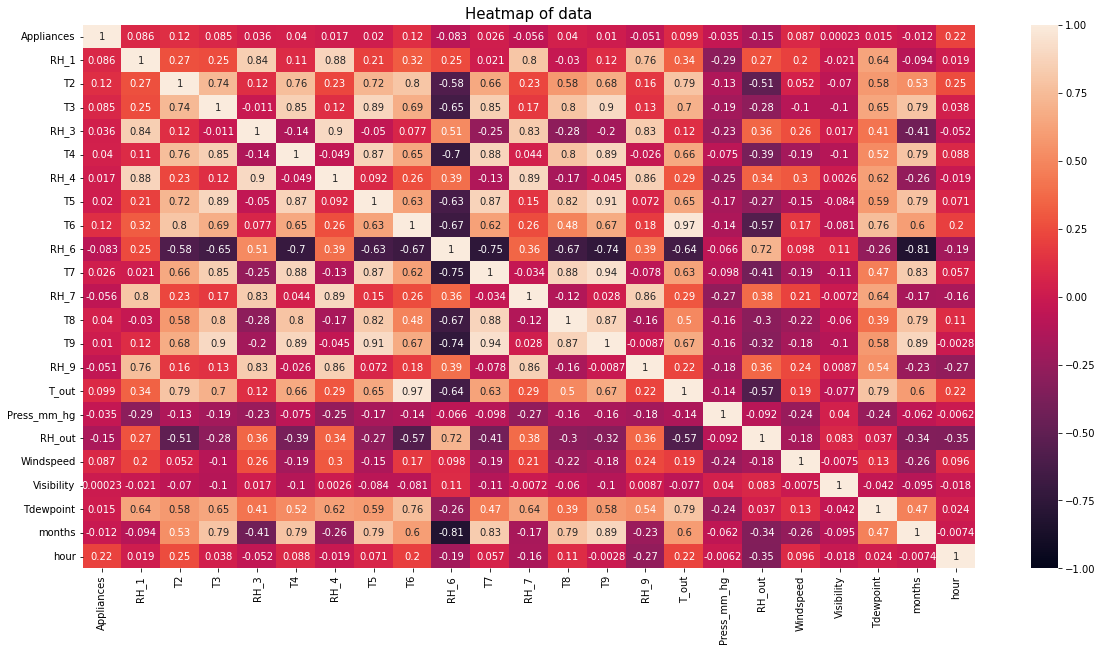

In [90]:
#checking correlation with all columns using heat map
corrmat = df.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True)
plt.title("Heatmap of data",fontsize= 15)
plt.show()

from heat map we can abserve there are Multicollinearity present

some columns have less corelation with dependent variable we need 



In [91]:
#droping visibality column
df.drop("Visibility", axis=1,inplace=True)

Checking Multicollinearity 

In [92]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [93]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances']]]).sort_values(by='VIF',ascending=False)

,variables,VIF
12,T9,2707.214928
15,Press_mm_hg,2071.088183
3,RH_3,1550.147894
9,T7,1459.801362
16,RH_out,1382.302211
5,RH_4,1299.482115
6,T5,1073.531043
2,T3,994.927767
4,T4,863.540125
11,T8,808.345753


in  our data set have more Multicollinearity features present but we are not removing them 

# Feature engineering

Checking duplicate values

In [94]:
len(df[df.duplicated()])

0

no duplicates are there in our data set

### checking null values

In [95]:
#Checking null values
df.isnull().sum()

Appliances     0
RH_1           0
T2             0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Tdewpoint      0
months         0
hour           0
dtype: int64

### checking outliers

In [96]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     2138
RH_1            146
T2              546
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Tdewpoint        10
months            0
hour              0
dtype: int64

majority of columns have outliers we need to remove them

In [97]:
 #Replacing outliers 
for i  in df.columns:
  #if(i not in ['RH_4','RH_6','T9','months','hour']):
  if(i =='Appliances'):
   Q1 = df[i].quantile(0.25)
   Q3 = df[i].quantile(0.75)
   IQR = Q3 - Q1

   df=df[(df[i]<(Q3 + 1.5 * IQR))]
   df=df[(df[i]>(Q1 - 1.5 * IQR))] 

In [98]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Appliances     857
RH_1           127
T2             473
T3             117
RH_3            11
T4             204
RH_4             0
T5             249
T6             397
RH_6             0
T7               0
RH_7            37
T8              93
T9               7
RH_9            23
T_out          332
Press_mm_hg    189
RH_out         279
Windspeed      224
Tdewpoint       16
months           0
hour             0
dtype: int64

majority of outliers are removed

In [99]:
Q1 = df['Appliances'].quantile(0.25)
Q3 = df['Appliances'].quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 * IQR
upper_limit

125.0

In [100]:
#still we have 3% outliers in dependent variable we have to remove that also
df=df[df['Appliances']<125]


In [101]:
df.shape

(16740, 22)

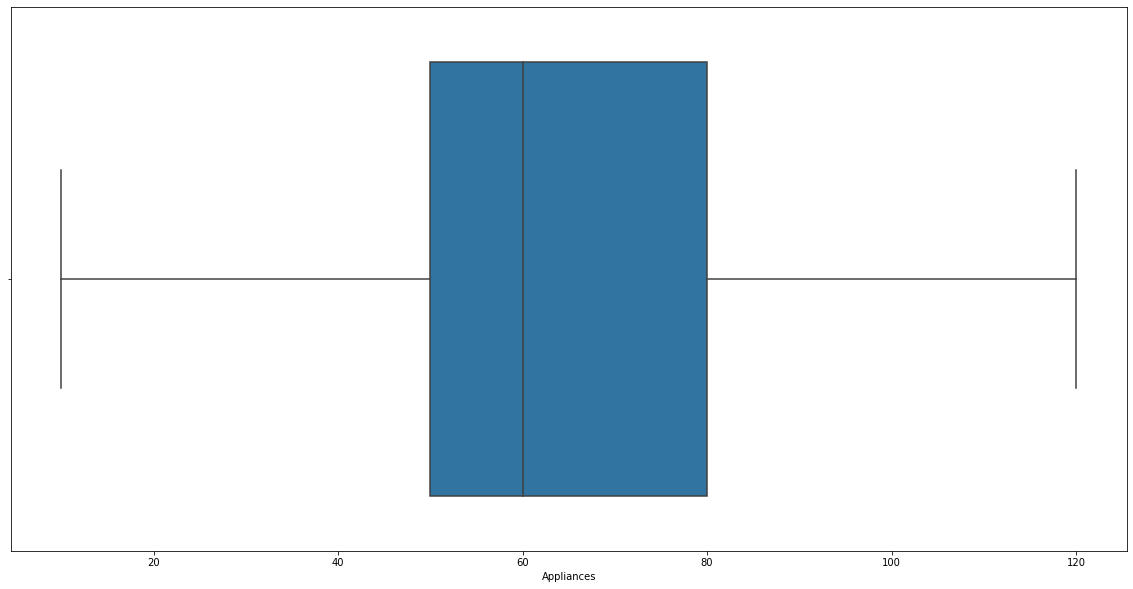

In [102]:
sns.boxplot(df.Appliances)

# test and train split

In [103]:
df.head()

,Appliances,RH_1,T2,T3,RH_3,T4,RH_4,T5,T6,RH_6,...,T8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,months,hour
0,60,47.596667,19.2,19.79,44.730000,19.000000,45.566667,17.166667,7.026667,84.256667,...,18.2,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,1,17
1,60,46.693333,19.2,19.79,44.790000,19.000000,45.992500,17.166667,6.833333,84.063333,...,18.2,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,1,17
2,50,46.300000,19.2,19.79,44.933333,18.926667,45.890000,17.166667,6.560000,83.156667,...,18.2,17.000000,45.50,6.366667,733.7,92.0,6.333333,5.1,1,17
3,50,46.066667,19.2,19.79,45.000000,18.890000,45.723333,17.166667,6.433333,83.423333,...,18.1,17.000000,45.40,6.250000,733.8,92.0,6.000000,5.0,1,17
4,60,46.333333,19.2,19.79,45.000000,18.890000,45.530000,17.200000,6.366667,84.893333,...,18.1,17.000000,45.40,6.133333,733.9,92.0,5.666667,4.9,1,17


In [104]:
df.shape

(16740, 22)

In [105]:
Y=df['Appliances']
df.drop("Appliances",axis=1,inplace=True)


In [106]:
X=df

after removing outliers its almost normally distributed 

In [107]:
#spliting train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size = 0.2, random_state = 10) 
print(X_train.shape)
print(X_test.shape)

(13392, 21)
(3348, 21)


using minmax scaler for scaling down data

In [108]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Fitting the multiple models

### Linear regression

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [110]:
reg.score(X_train, y_train)

0.333022767707542

In [111]:
reg.coef_

array([ 88.06520624,  13.3340257 ,  18.98304428, -41.23049287,
         2.14684028,   6.64245068,   6.44076645,  42.72043794,
        -0.72548343, -17.39894417, -10.60372253,  69.92898876,
       -41.88899769, -32.45498459, -10.26701203,  -4.39344083,
         4.10474295,   6.44659565, -19.59577349, -12.49984485,
        15.04814647])

In [112]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 360.082695637618
MSE on test is 370.7521162027977
RMSE on train is 18.975845057272625
RMSE on test is 19.254924466296867
Training MAE: 14.79
Test MAE: 14.92
R2 train : 0.333022767707542
R2 test : 0.3144994503380163
Adjusted R2 train :  0.3319751594892816
Adjusted R2 test :  0.3101712748891583


### Laso regression

In [113]:
#implementing lasso regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [114]:
lasso.score(X_train, y_train)

0.3330077953928221

In [115]:
#predicting the values for train and test set
y_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 360.0907787792655
MSE on test is 370.78597740721284
RMSE on train is 18.976058041101833
RMSE on test is 19.255803733088182
Training MAE: 14.79
Test MAE: 14.92
R2 train : 0.3330077953928221
R2 test : 0.31443684280801354
Adjusted R2 train :  0.331960163657837
Adjusted R2 test :  0.31010827206206293


### Ridge regression

In [116]:
#implementing ridge regression
from sklearn.linear_model import Ridge
Ridge  = Ridge(alpha=0.001 , max_iter= 3000)
Ridge.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=3000)

In [117]:
Ridge.score(X_train, y_train)

0.3330227675706212

In [118]:
#predicting the values for train and test set
y_pred = Ridge.predict(X_train)
y_test_pred = Ridge.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 360.0826957115377
MSE on test is 370.7521624845974
RMSE on train is 18.975845059220358
RMSE on test is 19.254925668114055
Training MAE: 14.79
Test MAE: 14.92
R2 train : 0.3330227675706212
R2 test : 0.31449936476547946
Adjusted R2 train :  0.3319751593521457
Adjusted R2 test :  0.31017118877632577


### Ploynomial regression

In [119]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [120]:
lin2.score(X_poly, y_train)

0.7595658523538714

In [121]:
#predicting the values for train and test set
y_pred = lin2.predict(X_poly)
y_test_pred = lin2.predict(X_poly_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 129.80379511633595
MSE on test is 204.20109006804202
RMSE on train is 11.393146848712867
RMSE on test is 14.28989468358819
Training MAE: 8.78
Test MAE: 10.70
R2 train : 0.7595658523538714
R2 test : 0.6224432623153218
Adjusted R2 train :  0.7591882070957885
Adjusted R2 test :  0.6200594103936807


### Decision Tree

In [122]:
#implementing DecisionTree regression
#tree1 = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=10)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=10)

In [123]:
#predicting the values for train and test set
y_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 314.86462551840134
MSE on test is 328.5826925844732
RMSE on train is 17.74442519549172
RMSE on test is 18.126850045842858
Training MAE: 13.55
Test MAE: 13.85
R2 train : 0.4167797036089368
R2 test : 0.3924684269290456
Adjusted R2 train :  0.4158636507873802
Adjusted R2 test :  0.3886325390653985


### Random Forest

In [124]:
#implementing RandomForest
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=10)

In [125]:
#predicting the values for train and test set
y_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 19.787555256869773
MSE on test is 144.4671505376344
RMSE on train is 4.448320498443179
RMSE on test is 12.019448845002604
Training MAE: 3.28
Test MAE: 8.92
R2 train : 0.9633477281775762
R2 test : 0.7328880759577938
Adjusted R2 train :  0.9632901591642425
Adjusted R2 test :  0.7312015605023259


### GradientBoostingRegression

In [126]:
#implementing GradientBoostingRegression
# create regressor object
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
gdb.fit(X_train, y_train) 

GradientBoostingRegressor(random_state=10)

In [127]:
#predicting the values for train and test set
y_pred = gdb.predict(X_train)
y_test_pred = gdb.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 230.06693373695117
MSE on test is 253.82730887357727
RMSE on train is 15.167957467535013
RMSE on test is 15.931958726835106
Training MAE: 11.57
Test MAE: 12.11
R2 train : 0.5738495391061134
R2 test : 0.5306870759521607
Adjusted R2 train :  0.573180192832458
Adjusted R2 test :  0.5277238855116902


### XGB Regression

In [128]:
#implementing XGB Regression
# create regressor object
xgb = XGBRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
xgb.fit(X_train, y_train) 

[08:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=10)

In [129]:
#predicting the values for train and test set
y_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 232.06381434280925
MSE on test is 254.0657293368393
RMSE on train is 15.233640876127062
RMSE on test is 15.93943942981808
Training MAE: 11.62
Test MAE: 12.12
R2 train : 0.5701507390364369
R2 test : 0.5302462494498315
Adjusted R2 train :  0.5694755831291642
Adjusted R2 test :  0.5272802756790698


### LGBM regression

In [130]:
#implementing LGBM Regression
# create regressor object
lgbm = LGBMRegressor(n_estimators = 100, random_state = 10)
 
# fit the regressor with x and y data
lgbm.fit(X_train, y_train) 

LGBMRegressor(random_state=10)

In [131]:
#predicting the values for train and test set
y_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

MSE_train  = mean_squared_error(y_train, y_pred)
print("MSE on train is" , MSE_train)

MSE_test  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE_test)

RMSE = np.sqrt(MSE_train)
print("RMSE on train is" ,RMSE)

RMSE = np.sqrt(MSE_test)
print("RMSE on test is" ,RMSE)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

r2 = r2_score(y_train, y_pred)
print("R2 train :" ,r2)

r2 = r2_score(y_test, y_test_pred)
print("R2 test :" ,r2)

print("Adjusted R2 train : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("Adjusted R2 test : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE on train is 134.22756607661427
MSE on test is 182.04876434553168
RMSE on train is 11.585662090558928
RMSE on test is 13.492544769076428
Training MAE: 8.83
Test MAE: 10.18
R2 train : 0.7513717498681702
R2 test : 0.6634017108188655
Adjusted R2 train :  0.750981234292047
Adjusted R2 test :  0.6612764660585516


# Croos validation and hyperparameter tuning

In [132]:
reg = LinearRegression()
lasso  = Lasso(alpha=0.001 , max_iter= 3000,random_state=10)
tree1 = DecisionTreeRegressor(random_state=10)
regressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)


In [133]:
#installing package
!pip install skopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [134]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

### Lasso

In [135]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................alpha=0.0014849237625060674; total time=   0.1s
[CV] END ........................alpha=0.0014849237625060674; total time=   0.2s
[CV] END ........................alpha=0.0014849237625060674; total time=   0.2s
[CV] END ........................alpha=0.0014849237625060674; total time=   0.3s
[CV] END ........................alpha=0.0014849237625060674; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=572.6426146578741; total time=   0.0s
[CV] END ............................alpha=572.6426146578741; total time=   0.0s
[CV] END ............................alpha=572.6426146578741; total time=   0.0s
[CV] END ............................alpha=572.6426146578741; total time=   0.0s
[CV] END ............................alpha=572.6426146578741; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5,
              estimator=Lasso(alpha=0.001, max_iter=3000, random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [136]:
lr_bayes.best_estimator_

Lasso(alpha=0.0014849237625060674, max_iter=3000, random_state=10)

In [137]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.33298976058523744
Test R2 score :  0.3143962651685537


### Ridge

In [138]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=Ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=93724.07209689752; total time=   0.0s
[CV] END ............................alpha=93724.07209689752; total time=   0.0s
[CV] END ............................alpha=93724.07209689752; total time=   0.0s
[CV] END ............................alpha=93724.07209689752; total time=   0.0s
[CV] END ............................alpha=93724.07209689752; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................alpha=0.00014718559175753445; total time=   0.0s
[CV] END .......................alpha=0.00014718559175753445; total time=   0.0s
[CV] END .......................alpha=0.00014718559175753445; total time=   0.0s
[CV] END .......................alpha=0.00014718559175753445; total time=   0.0s
[CV] END .......................alpha=0.00014718559175753445; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(alpha=0.001, max_iter=3000), n_iter=10,
              scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [139]:
lr_bayes.best_estimator_

Ridge(alpha=0.0007600213610523137, max_iter=3000)

In [140]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.3330227676284495
Test R2 score :  0.3144993853164767


### Polynomial REgression

Ridge 

In [141]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=Ridge,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_poly,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........................alpha=5774.2406035375925; total time=   2.7s
[CV] END ...........................alpha=5774.2406035375925; total time=   2.2s
[CV] END ...........................alpha=5774.2406035375925; total time=   2.4s
[CV] END ...........................alpha=5774.2406035375925; total time=   3.8s
[CV] END ...........................alpha=5774.2406035375925; total time=   3.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=692.7021583790035; total time=   3.7s
[CV] END ............................alpha=692.7021583790035; total time=   3.6s
[CV] END ............................alpha=692.7021583790035; total time=   4.2s
[CV] END ............................alpha=692.7021583790035; total time=   3.9s
[CV] END ............................alpha=692.7021583790035; total time=   3.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Ridge(alpha=0.001, max_iter=3000), n_iter=10,
              scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [142]:
lr_bayes.best_estimator_

Ridge(alpha=0.00012866366420099016, max_iter=3000)

In [143]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_poly,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_poly_test,y_test))

Train R2 square :  0.7230966442538068
Test R2 score :  0.6283468501115432


### DecisionTreeRegresson

In [144]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=tree1,
                        search_spaces = {
                          "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.1s
[CV] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.1s
[CV] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.1s
[CV] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.1s
[CV] END max_depth=3, max_features=None, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, 

BayesSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                             'max_features': ['auto', 'log2', 'sqrt', None],
                             'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,
                                                70, 80, 90],
                             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10],
                             'splitter': ['best', 'random']},
              verbose=2)

In [145]:
lr_bayes.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=9, random_state=10)

In [146]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.5108836726074684
Test R2 score :  0.4655776938230093


### Random Forest

In [147]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':[4,6,8,10,12] ,
                          'min_samples_leaf': [10,30,40,50,60,80],
                          'min_samples_split': [50,80,100,150,200],
                          'n_estimators': [30,50,80,100,120,150]
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=  11.8s
[CV] END max_depth=12, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=  11.9s
[CV] END max_depth=12, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=  11.8s
[CV] END max_depth=12, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=  11.8s
[CV] END max_depth=12, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=  11.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=80, n_estimators=80; total time=   3.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=80, n_estimators=80; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=80, n_estimators=80; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_spli

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [4, 6, 8, 10, 12],
                             'min_samples_leaf': [10, 30, 40, 50, 60, 80],
                             'min_samples_split': [50, 80, 100, 150, 200],
                             'n_estimators': [30, 50, 80, 100, 120, 150]},
              verbose=2)

In [148]:
lr_bayes.best_estimator_

RandomForestRegressor(max_depth=12, min_samples_leaf=40, min_samples_split=100,
                      n_estimators=150, random_state=10)

In [149]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.6395833991472423
Test R2 score :  0.5866898522288808


### GradientBoostingRegressor

In [150]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=gdb ,
                           search_spaces = {
                           'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                            "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,50),
                          'min_samples_split': Integer(50,100),
                          'n_estimators': Integer(10,30)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=huber, max_depth=5, min_samples_leaf=20, min_samples_split=69, n_estimators=19; total time=   1.8s
[CV] END criterion=friedman_mse, loss=huber, max_depth=5, min_samples_leaf=20, min_samples_split=69, n_estimators=19; total time=   1.8s
[CV] END criterion=friedman_mse, loss=huber, max_depth=5, min_samples_leaf=20, min_samples_split=69, n_estimators=19; total time=   1.8s
[CV] END criterion=friedman_mse, loss=huber, max_depth=5, min_samples_leaf=20, min_samples_split=69, n_estimators=19; total time=   1.8s
[CV] END criterion=friedman_mse, loss=huber, max_depth=5, min_samples_leaf=20, min_samples_split=69, n_estimators=19; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=quantile, max_depth=5, min_samples_leaf=39, min_samples_split=75, n_estimators=24; total time=   2.1s
[CV] END criterion=friedman_mse, loss=quantile, max_depth

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=10),
              n_iter=10, scoring='r2',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['squared_error', 'absolute_error',
                                      'huber', 'quantile'],
                             'max_depth': Integer(low=4, high=6, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=30, prior='uniform', transform='normalize')},
              verbose=2)

In [151]:
lr_bayes.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_leaf=35,
                          min_samples_split=61, n_estimators=22,
                          random_state=10)

In [152]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.5929779716629393
Test R2 score :  0.54805749785772


### XGB regression

In [153]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=xgb ,
                       search_spaces = {
                          'max_depth': [4,6,8,12],
                          'min_samples_split' :[50,100,150,200],
                          'n_estimators': [50,80,100],
                          'min_samples_leaf' : [40,50,70]
                        },cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[08:18:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   2.6s
[08:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   2.7s
[08:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   2.6s
[08:18:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   2.6s
[08:18:37] WARNING: /workspac

BayesSearchCV(cv=5, estimator=XGBRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': [4, 6, 8, 12],
                             'min_samples_leaf': [40, 50, 70],
                             'min_samples_split': [50, 100, 150, 200],
                             'n_estimators': [50, 80, 100]},
              verbose=2)

In [154]:
lr_bayes.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=100,
             random_state=10)

In [155]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.8515807881140488
Test R2 score :  0.7044055234470554


### LGBM regression

In [156]:
#Croos validation and hyperparameter tuning
lr_bayes = BayesSearchCV(estimator=lgbm ,
                           search_spaces = {
                            'max_depth': Integer(4,20),
                          'num_leaves': Integer(10,80),
                         'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........max_depth=7, n_estimators=18, num_leaves=41; total time=   0.2s
[CV] END ........max_depth=7, n_estimators=18, num_leaves=41; total time=   0.2s
[CV] END ........max_depth=7, n_estimators=18, num_leaves=41; total time=   0.2s
[CV] END ........max_depth=7, n_estimators=18, num_leaves=41; total time=   0.2s
[CV] END ........max_depth=7, n_estimators=18, num_leaves=41; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........max_depth=6, n_estimators=61, num_leaves=52; total time=   0.3s
[CV] END ........max_depth=6, n_estimators=61, num_leaves=52; total time=   0.3s
[CV] END ........max_depth=6, n_estimators=61, num_leaves=52; total time=   0.3s
[CV] END ........max_depth=6, n_estimators=61, num_leaves=52; total time=   0.3s
[CV] END ........max_depth=6, n_estimators=61, num_leaves=52; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=10), n_iter=10,
              scoring='r2',
              search_spaces={'max_depth': Integer(low=4, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=10, high=80, prior='uniform', transform='normalize')},
              verbose=2)

In [157]:
lr_bayes.best_estimator_

LGBMRegressor(max_depth=19, n_estimators=57, num_leaves=42, random_state=10)

In [158]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.7385361419118865
Test R2 score :  0.6577166337571203


### creating table with all models accuracy

In [159]:
from sklearn.linear_model import Ridge

In [160]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso(alpha=0.0002953248602060644, max_iter=3000, random_state=10)],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge(alpha=0.00037654260652948403, max_iter=3000)],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor(max_depth=11, max_leaf_nodes=70, min_samples_leaf=6,
                      random_state=10, splitter='random')],
           ['RandomForestRegressor: ',RandomForestRegressor(max_depth=10, min_samples_leaf=50, min_samples_split=80,
                      random_state=10)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_leaf=18,
                          min_samples_split=87, n_estimators=29,random_state=10)] ,
           ['XGBRegressor: ', XGBRegressor(max_depth=8, min_samples_leaf=50, min_samples_split=150, random_state=10)],
           ['LGBMRegressor: ', LGBMRegressor(max_depth=18, n_estimators=90, num_leaves=76, random_state=10)]          
        ]

In [161]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

[08:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [162]:
metrics_df = pd.DataFrame(model_data)
metrics_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegression:,14.790192,14.921503,0.333023,0.314499,18.975845,19.254924
1,Lasso:,14.789872,14.921514,0.333021,0.314484,18.975864,19.255142
2,Ridge:,14.788367,14.920470,0.332902,0.314334,18.977557,19.257250
3,PolynomialRegression:,9.564676,10.823573,0.708412,0.621437,12.546717,14.308926
4,DecisionTreeRegressor:,12.149892,12.585351,0.523073,0.480919,16.046170,16.755430
5,RandomForestRegressor:,10.865465,11.579188,0.619337,0.570279,14.335600,15.245130
6,GradientBoostingRegressor:,10.640776,11.409381,0.631131,0.576467,14.111784,15.134969
7,XGBRegressor:,6.803055,9.494116,0.851581,0.704406,8.951394,12.644046
8,LGBMRegressor:,7.409651,9.545530,0.824790,0.701337,9.725787,12.709509


From above dataframe  we can see linearRegression is not performing good at all.

XGBRegression is giving r2 value of 0.85 for train data and 0.70 for test data but its overfitting the model becouse of less train r2 value so we cant conider as this model is our good model

LGBMRegression is giving r2 value 0.82 for train data and 0.70 for test data and comparing XGBRegression the LGBMRegression have less overfitting and r2 value is also good. so LGBMRegression is good model for this dataset.





# Model explainability

For knowing which are the features is important for predicting we are using Model explainability.

In [163]:
##installing package
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [164]:
df.head()

,RH_1,T2,T3,RH_3,T4,RH_4,T5,T6,RH_6,T7,...,T8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,months,hour
0,47.596667,19.2,19.79,44.730000,19.000000,45.566667,17.166667,7.026667,84.256667,17.200000,...,18.2,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,1,17
1,46.693333,19.2,19.79,44.790000,19.000000,45.992500,17.166667,6.833333,84.063333,17.200000,...,18.2,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,1,17
2,46.300000,19.2,19.79,44.933333,18.926667,45.890000,17.166667,6.560000,83.156667,17.200000,...,18.2,17.000000,45.50,6.366667,733.7,92.0,6.333333,5.1,1,17
3,46.066667,19.2,19.79,45.000000,18.890000,45.723333,17.166667,6.433333,83.423333,17.133333,...,18.1,17.000000,45.40,6.250000,733.8,92.0,6.000000,5.0,1,17
4,46.333333,19.2,19.79,45.000000,18.890000,45.530000,17.200000,6.366667,84.893333,17.200000,...,18.1,17.000000,45.40,6.133333,733.9,92.0,5.666667,4.9,1,17


In [165]:
Y.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [166]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

In [167]:
X_train1=pd.DataFrame(X_train)
X_test1=pd.DataFrame(X_test)

In [168]:
X_test1.columns=[['RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Tdewpoint', 'months', 'hour']]

In [169]:
X_train1.columns=[['RH_1', 'T2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6', 'RH_6', 'T7',
       'RH_7', 'T8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Tdewpoint', 'months', 'hour']]

In [170]:
#lgbm regressor
lgbm = LGBMRegressor(max_depth=18, n_estimators=90, num_leaves=76, random_state=10)
 
# fit the regressor with x and y data
lgbm=lgbm.fit(X_train, y_train) 

In [171]:
# Define a tree explainer for the built model
lgbm_model=lr_bayes.best_estimator_
explainer = shap.TreeExplainer(lgbm)

In [172]:
# Obtain a Scatter Summary Plot 
explainer_train = shap.TreeExplainer(lgbm_model)
shap_values_train = explainer_train.shap_values(X_train1)

In [173]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
explainer_train = shap.TreeExplainer(lgbm_model)
# obtain shap values for the first row of the test data
shap.force_plot(explainer_train.expected_value[0], shap_values_train[0], X_train1.iloc[0])

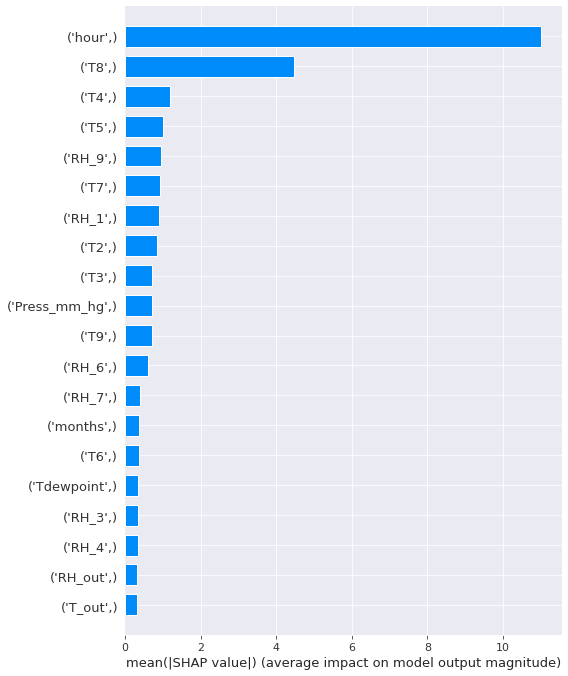

In [174]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="bar")

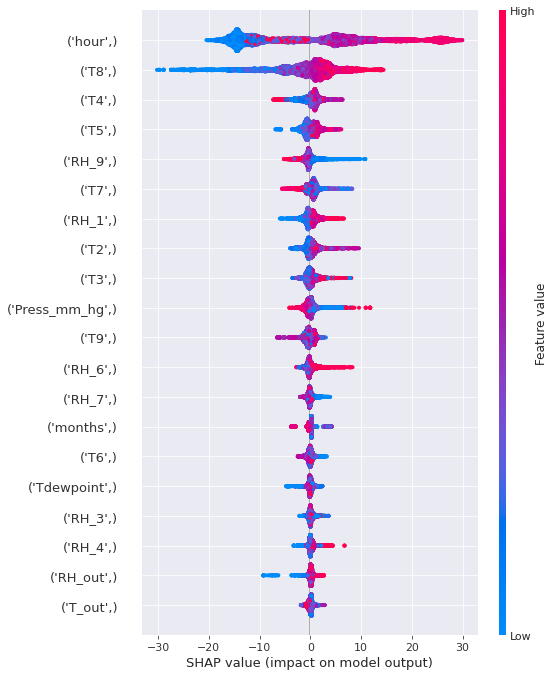

In [175]:
# Obtain a dot Summary Plot
shap.summary_plot(shap_values_train, X_train1, plot_type="dot")

# Conclusion